<a href="https://colab.research.google.com/github/gayakwadmilind/ML/blob/main/FAIR_01042022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#missing values
rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64
total missing values
390271
missing values percentage
rotten_tomatoes_link     0.000000
critic_name              1.639710
top_critic               0.000000
publisher_name           0.000000
review_type              0.000000
review_score            27.073575
review_date              0.000000
review_content           5.823452
dtype: float64
Data type of the each col of Dataframe :
rotten_tomatoes_link    object
critic_name             object
top_critic               int64
publisher_name          object
review_type              int64
review_score            object
review_date             object
review_content          object
dtype: object
0            NaN
1            NaN
2            NaN
3          3.5/5
4          

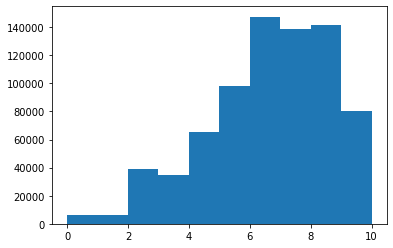

2.127445980291206
Histogram of the score


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.8/dist-packages/s

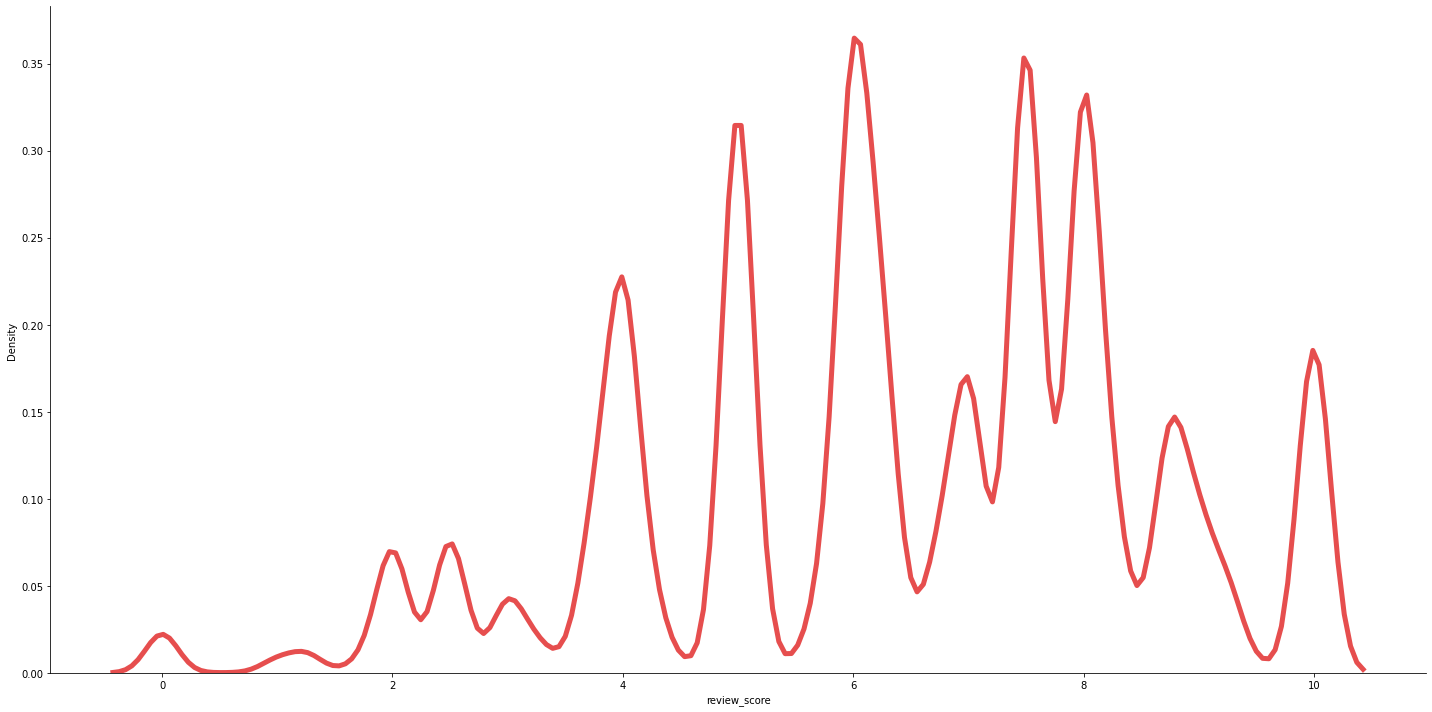

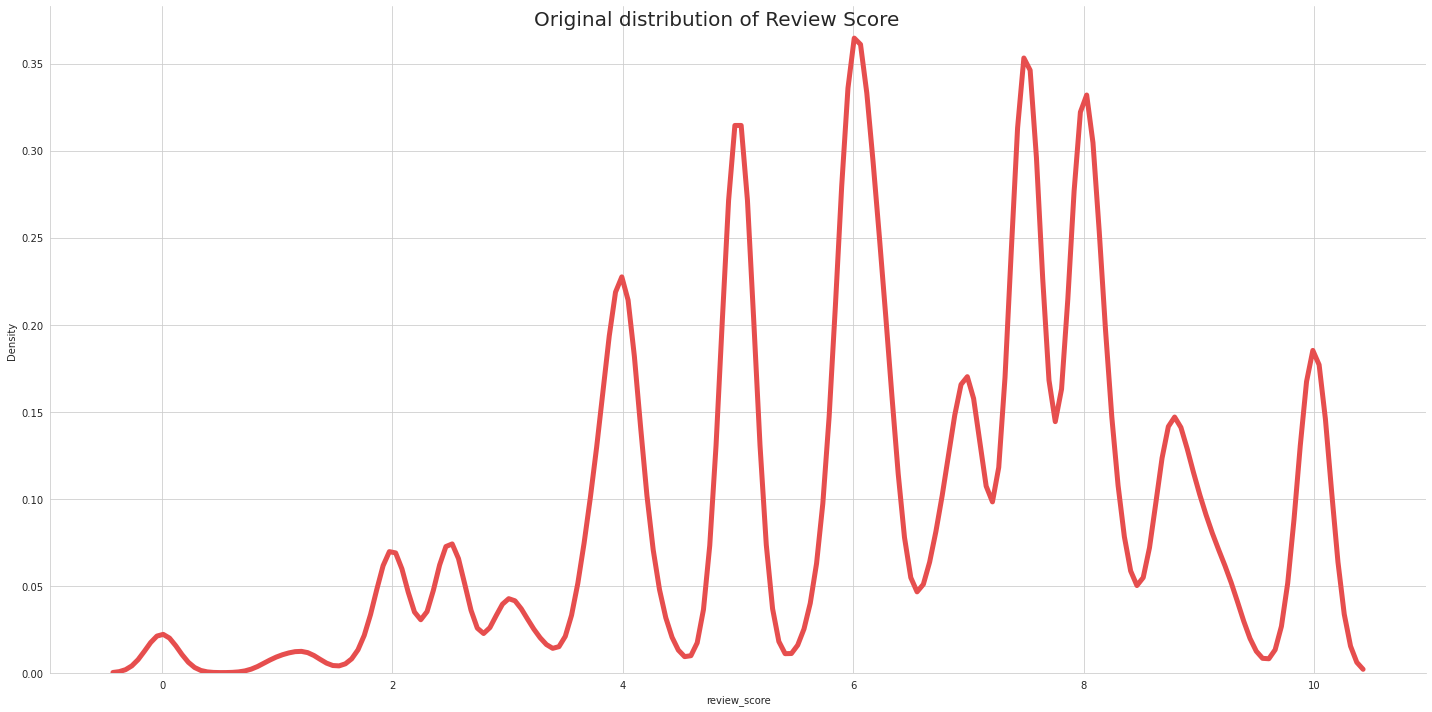

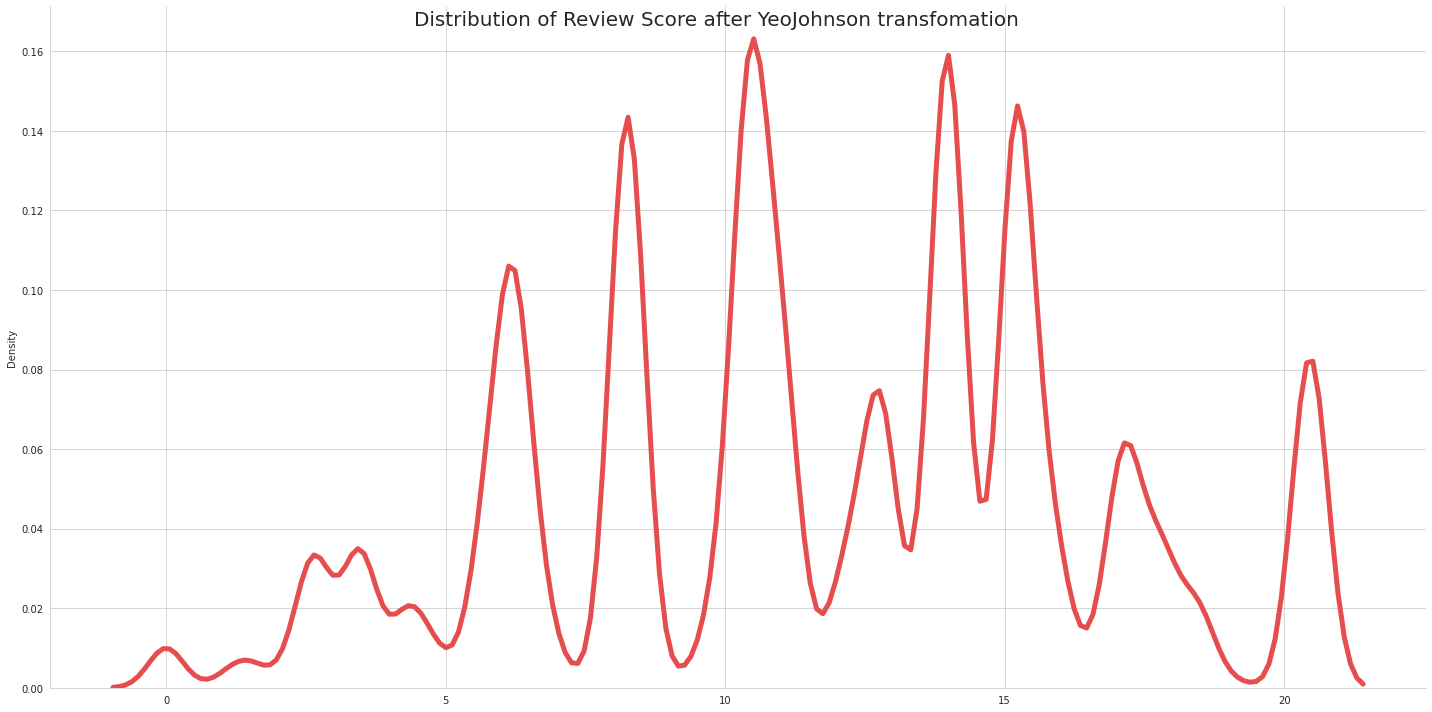

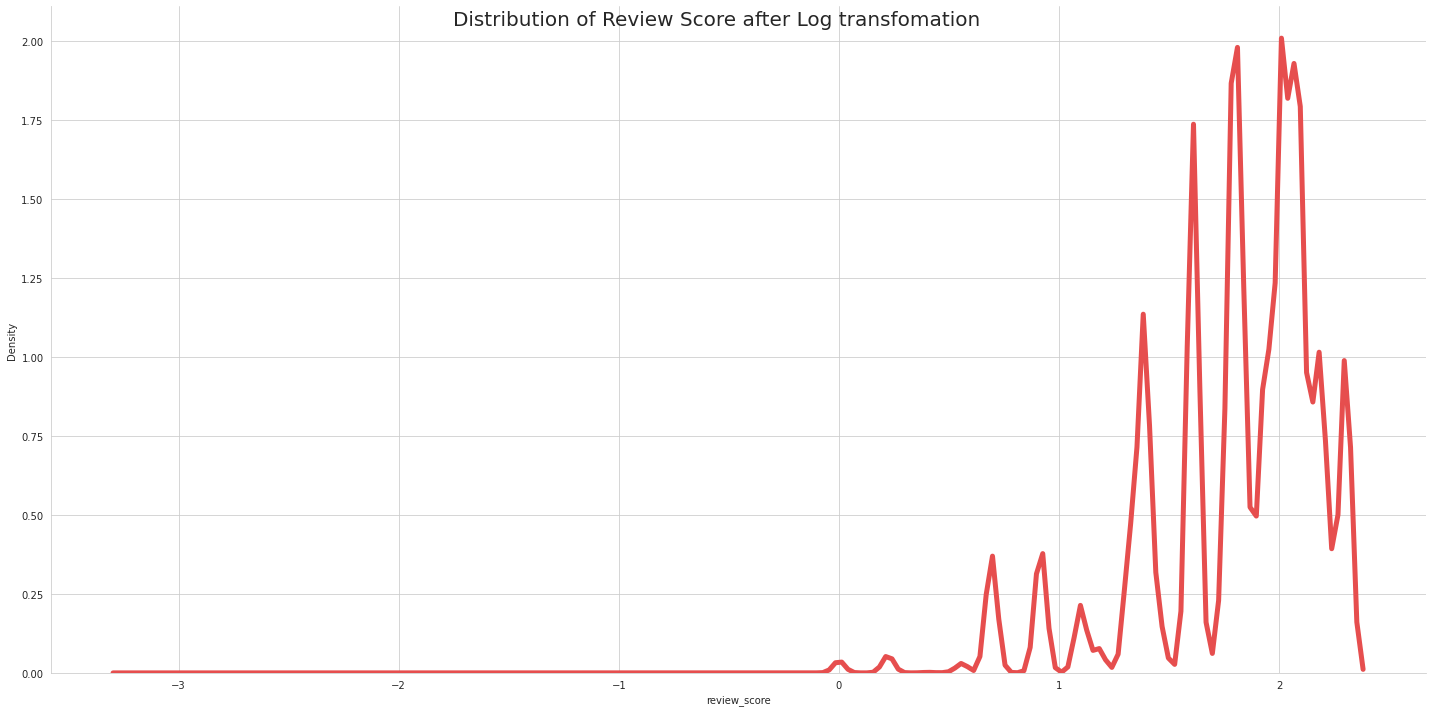

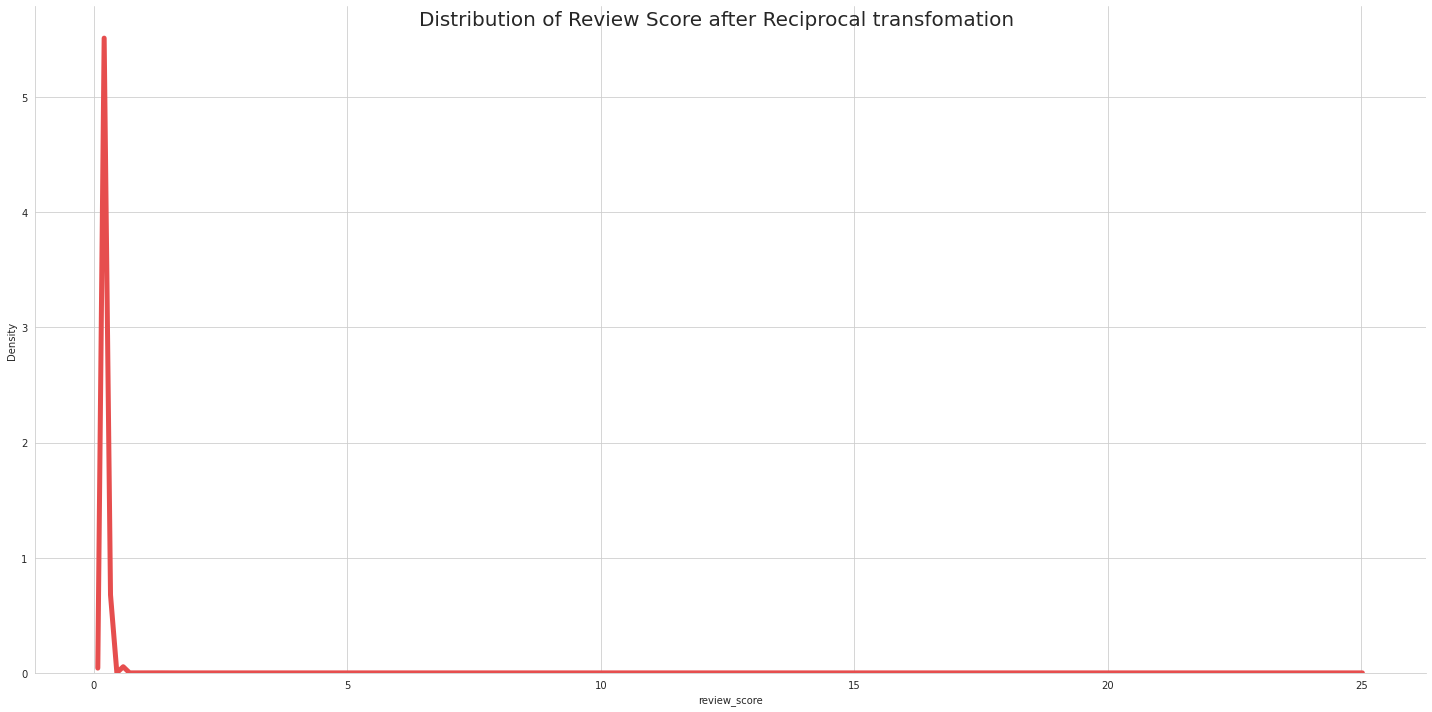

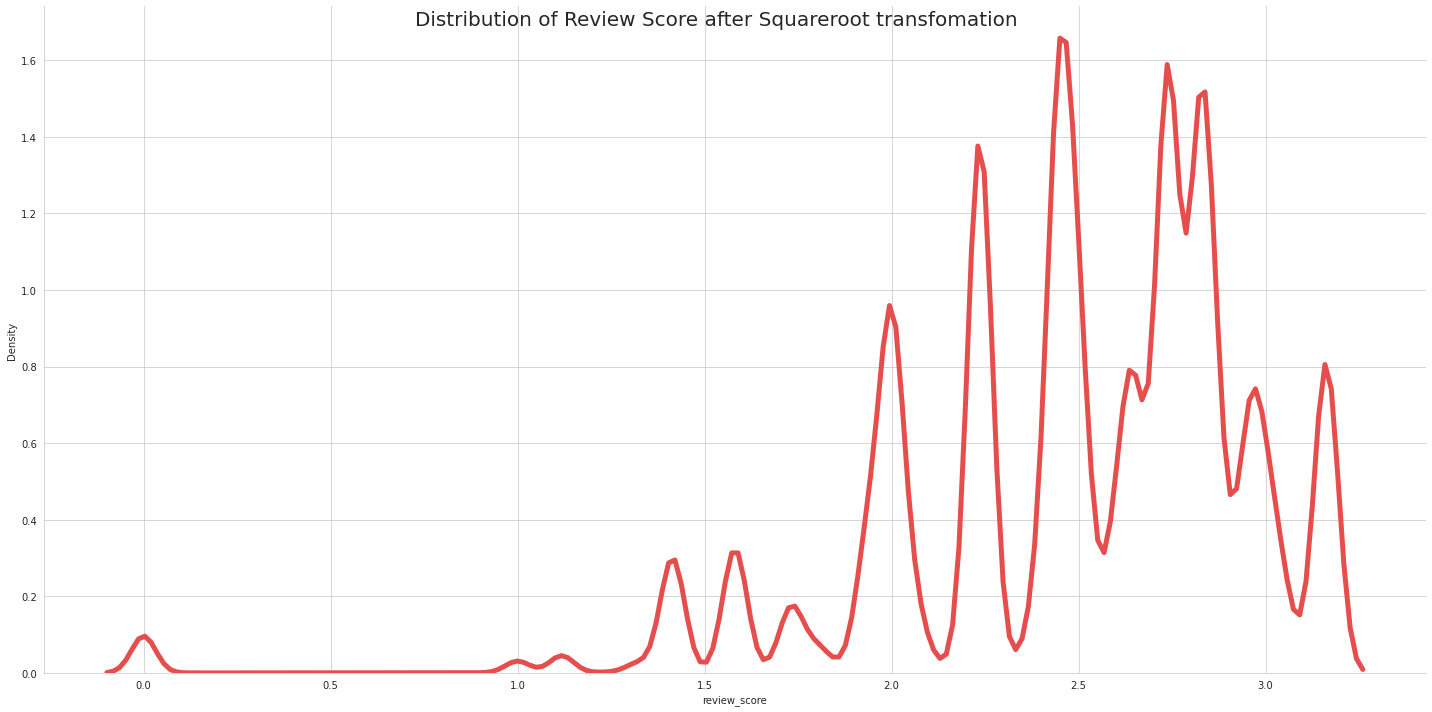

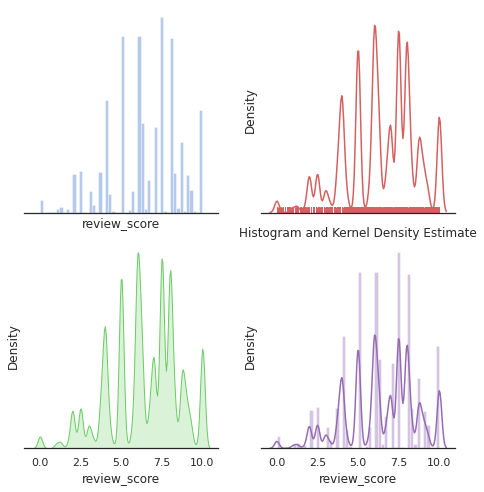

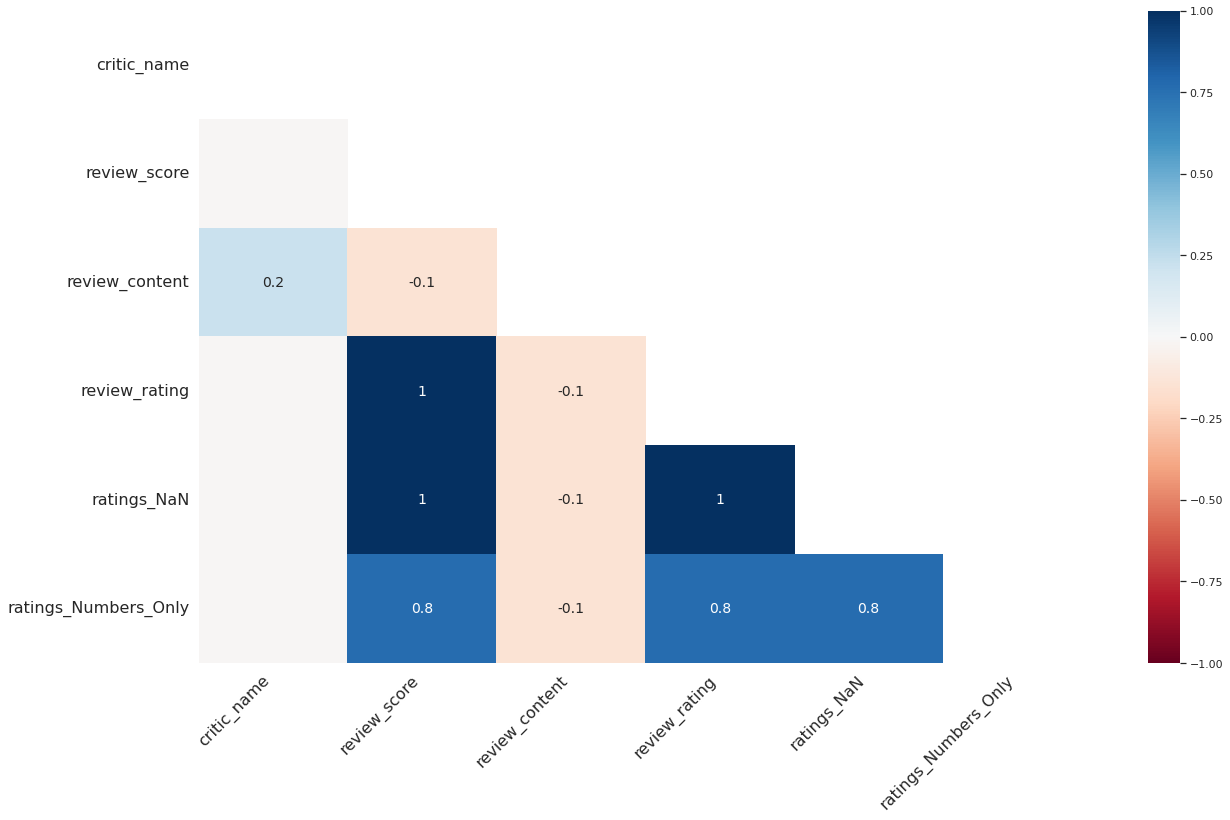

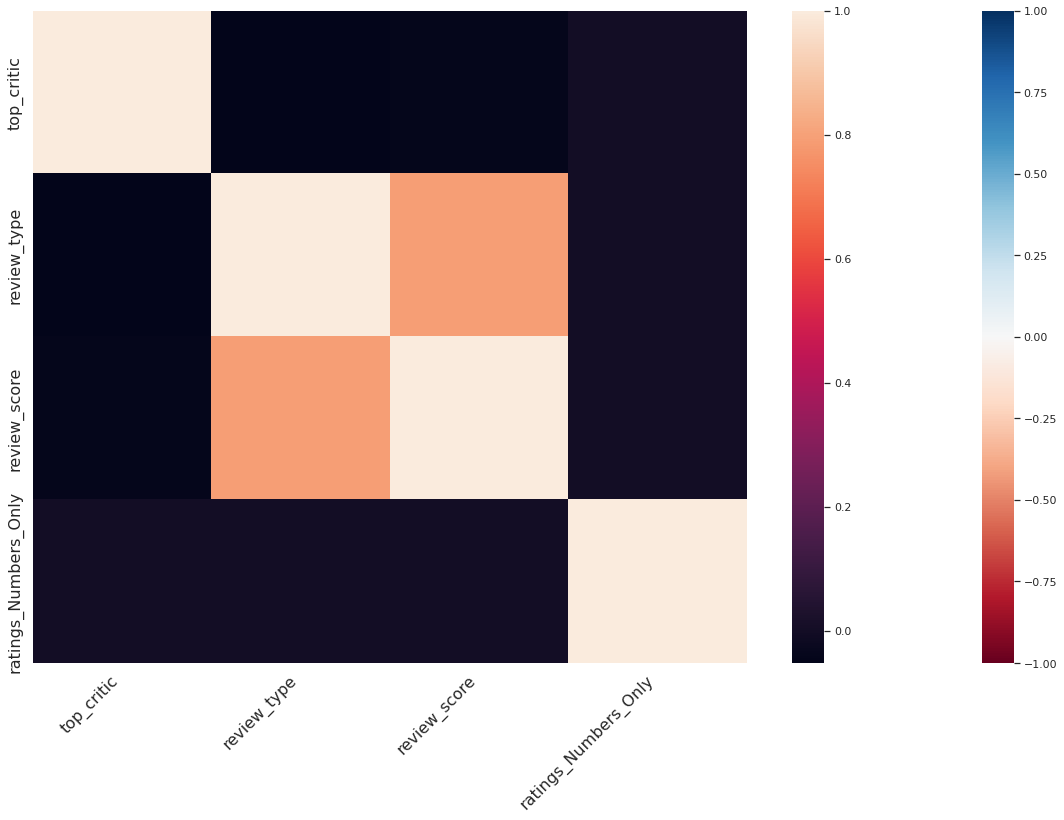

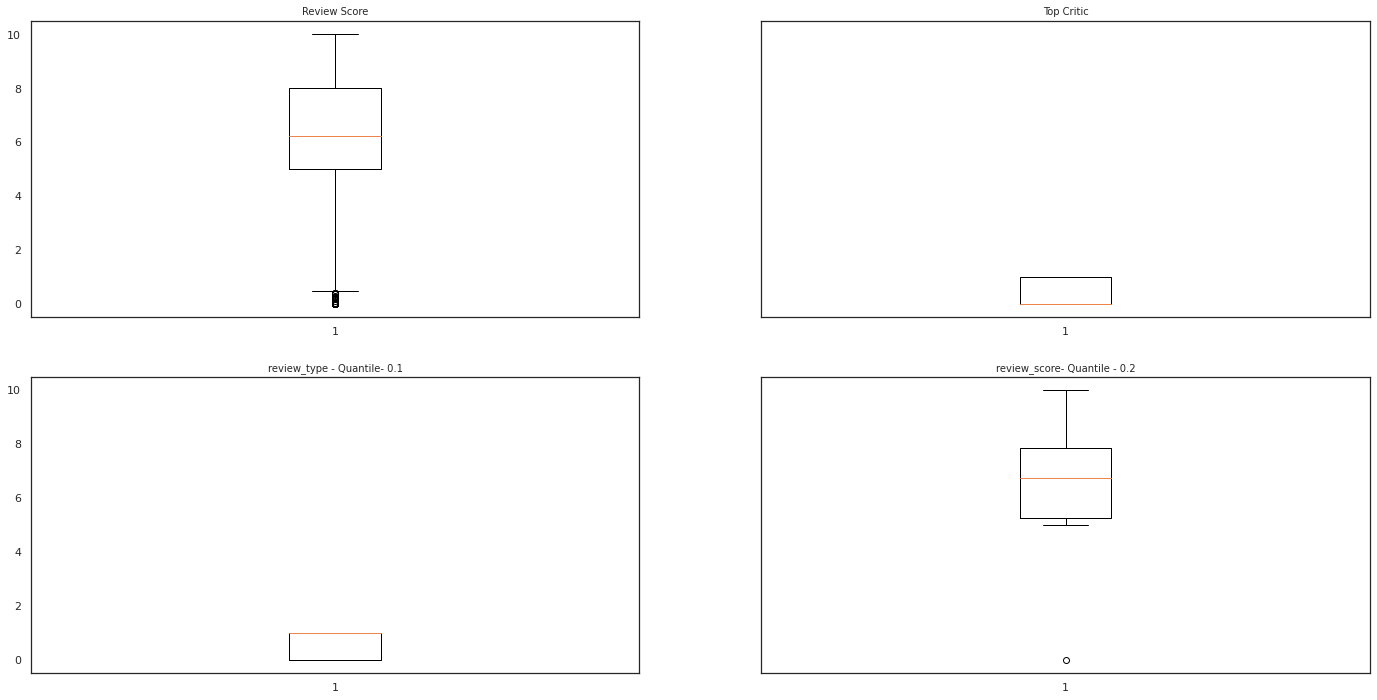

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from plotly.offline import init_notebook_mode,iplot
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import normaltest

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import os # accessing directory structure
import matplotlib.pyplot as mp

import seaborn as sb
# test classification dataset
from sklearn.datasets import make_classification

# test regression dataset
from sklearn.datasets import make_regression

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

movies_df = pd.read_csv('/content/drive/MyDrive/movie_dataset/rotten_tomatoes_critic_reviews.csv')

#missing values
print('#missing values')
print(movies_df.isnull().sum())
#total missing values
print('total missing values')
print(movies_df.isnull().sum().sum())
# missing values percentage
print('missing values percentage')
print(movies_df.isnull().sum()*100/len(movies_df))

#df['review_score'].fillna(df['review_score'].mode()[0], inplace=True)
#df['review_type'].fillna(df['review_type'].mode()[0], inplace=True)
#df['top_critic'].fillna(df['top_critic'].mode()[0], inplace=True)

#df['review_score'].fillna(df['review_score'].mode()[0], inplace=True)
#df['review_type'].fillna(df['review_type'].mode()[0], inplace=True)
#df['top_critic'].fillna(df['top_critic'].mode()[0], inplace=True)

#rotten_tomatoes_link	critic_name	top_critic	publisher_name	review_type	review_score	review_date	review_content

movies_df['Year'] = movies_df['review_date'].str.split('-').str[0]
movies_df['Year'] = movies_df['Year'].astype(int)
movies_df['Month'] = movies_df['review_date'].str.split('-').str[1]

movies_df['Month'] = movies_df['Month'].astype(int)
movies_df['Date'] = movies_df['review_date'].str.split('-').str[2]
movies_df['Date'] = movies_df['Date'].astype(int)

movies_df['review_date'] = movies_df['Year'].map(str)+ movies_df['Month'].map(str)+movies_df['Date'].map(str)
movies_df = movies_df.drop(['Year'],axis=1)
movies_df = movies_df.drop(['Month'],axis=1)
movies_df = movies_df.drop(['Date'],axis=1)

movies_df['top_critic'] = movies_df['top_critic'].map({True:1, False:0})
movies_df['review_type'] = movies_df['review_type'].map({'Fresh':1, 'Rotten':0})
#movies_df.replace(to_replace = np.nan, value =-99999)
dataTypeSeries = movies_df.dtypes
print('Data type of the each col of Dataframe :')
print(dataTypeSeries)

#movies_df['review_rating'].convert_objects(convert_numeric=True).dropna()

print(movies_df['review_score'])

#print(movies_df['review_rating'])
#df.replace(regex={r'a-zA-Z': '0000', 'foo': '00000'})

#movies_df = movies_df.replace(r'^\s*$', np.NaN, regex=True)
#movies_df['without_char_review_rating']=str(movies_df['review_rating']).replace(regex={r'a-zA-Z': '0000', np.NaN: '00000'})
#(movies_df['review_rating'])=str(movies_df['review_rating']).replace(to_replace='[^0-9]+', value='',inplace=True, regex=True)
#movies_df['review_rating']=re.sub('\D', '', str(movies_df['review_rating']))

#movies_df['review_rating_final'] = movies_df['ratings_Numbers_Only'].astype(int)
movies_df['review_rating'] = movies_df['review_score'].str.split('/').str[0]

print(movies_df['review_rating'])
#movies_df['ratings_NaN']=movies_df['review_rating'].interpolate(method ='linear', limit_direction ='forward', axis=0)
movies_df['ratings_NaN']=movies_df['review_rating'].interpolate(method='polynomial', order=2)
print(movies_df['ratings_NaN'])


movies_df['ratings_Numbers_Only'] = movies_df['ratings_NaN'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
#movies_df['ratings_Numbers_Only'] = re.findall(r'[\d\.\d]+', str(movies_df['ratings_NaN']))
print(movies_df['ratings_Numbers_Only'])



#movies_df.head(20)
#movies_df['review_rating'].all()== (re.findall('[a-zA-Z]', str(movies_df['review_rating']), flags))
#print(movies_df['review_rating'])
#if (movies_df['review_rating'].any()=='Nan'):
#  print('NaN Eureka')
#if (movies_df['review_rating'].all()== (re.findall('[a-zA-Z]', str(movies_df['review_rating']), flags))):
#  print('Chars Eureka')
#else:
 # print('No Chars Eureka')
#else:
  #print('No NaN Eureka')
#movies_df['review_rating'] = movies_df['review_rating'].astype(float)
#movies_df['review_outof'] = movies_df['review_score'].str.split('/').str[1]
#movies_df['review_outof'] = movies_df['review_outof'].astype(float)


#letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                         # " ",          # Replace all non-letters with spaces
                          #str(location))


#movies_df['data2'].isnull()&(movies_df['data2']=='NaN')


#final_review_rating= movies_df['review_rating']/movies_df['review_score'].astype(float)
#movies_df['review_score']= final_review_rating.astype(float)

#lr = LinearRegression()

#testdf = movies_df[movies_df['review_score'].isnull()==True]
#traindf = movies_df[movies_df['review_score'].isnull()==False]

#y = traindf['review_score']
#traindf.drop("review_score",axis=1,inplace=True)
#lr.fit(traindf,y)
#testdf.drop("review_score",axis=1,inplace=True)
#pred = lr.predict(testdf)
#testdf['review_score']= pred
#seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50


# generate univariate observations
#data = 5 * randn(100) + 50


# Shapiro-Wilk Test
# seed the random number generator
#seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50

# normality test
#stat, p = shapiro(data)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('For Shapiro-Wilk Test - Sample looks Gaussian (fail to reject H0)')
#else:
#	print('Sample does not look Gaussian (reject H0)')

# D'Agostino and Pearson's Test
# seed the random number generator
#seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50



# import file with data

# displaying heatmap
#mp.show()

# define dataset
#c_X, c_y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
#print(c_X.shape, c_y.shape)

# define dataset
#r_X, r_y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
#print(r_X.shape, r_y.shape)

# plotting correlation heatmap
#dataplot=sb.heatmap(movies_df.corr())
#def show_hist(x):
 #   plt.rcParams["figure.figsize"] = 15,18
  #  x.hist()
#show_hist(movies_df)
#def Show_PairPlot(x):
 #   sns.pairplot(x)
#Show_PairPlot(movies_df)

def cleaning_review_scores(x):
    x = re.sub(' +', '', x)
    if '/' in x: # rating is numeric, but need to transform it in score out of 10
        numer = float(x[:x.index('/')])
        denom = float(x[x.index('/')+1:])
        if (denom >= numer) and (denom > 0):
            return round(numer * (10 / denom), 2)
        else:
            return np.nan
    else: # rating is non-numeric
        if x == 'A':
            return 10
        elif x == 'A-':
            return 9.25
        elif x == 'B+':
            return 8.25
        elif x == 'B':
            return 7.5
        elif x == 'B-':
            return 6.75
        elif x == 'C+':
            return 5.75
        elif x == 'C':
            return 5
        elif x == 'C-':
            return 4.25
        elif x == 'D+':
            return 3.25
        elif x == 'D':
            return 2.5
        elif x == 'D-':
            return 1.75
        elif x == 'F':
            return 0

review_scores_df = movies_df[(movies_df.review_score.notnull()) & (movies_df.review_score.str.isnumeric() == False)]
review_scores_df['review_score'] = review_scores_df['review_score'].apply(cleaning_review_scores)
review_scores_df['review_score'] = pd.to_numeric(review_scores_df['review_score'], errors='coerce')
review_scores_df = review_scores_df[(review_scores_df.review_score.notnull()) & (review_scores_df.review_content.notnull())]
#review_scores_df['review_date'] = pd.to_datetime(review_scores_df['review_date'])
review_scores_df['review_date']=movies_df['review_date']
#review_scores_df['review_year'] = review_scores_df['review_date'].apply(lambda x: x.year)
#review_scores_df = review_scores_df[review_scores_df['review_year'] >= 2000]
#review_scores_df.insert(1, 'first_genre', review_scores_df['rotten_tomatoes_link'].map(movies_df.set_index('rotten_tomatoes_link')['first_genre']))
review_scores_df['review_type']=movies_df['review_type']
review_scores_df['top_critic']=movies_df['top_critic']
review_scores_df['review_content']=movies_df['review_content']

print(review_scores_df['review_score'])

# histogram plot
print ('Hostogram of review score')
pyplot.hist(review_scores_df['review_score'])
pyplot.show()

#ns.pairplot(review_scores_df)
#g= sns.pairplot(review_scores_df)
#g.map_upper(sns.histplot)
#g.map_lower(sns.kdeplot, fill=True)
#g.map_diag(sns.histplot, kde=True)
# define dataset
#r_X, r_y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
#print(r_X.shape, r_y.shape)

sns.displot(review_scores_df, x="review_score", kind="kde", color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
import numpy

speed = [32,111,138,28,59,77,97]

xx = numpy.std(review_scores_df['review_score'])

print(xx)
# Histogram of the score
print('Histogram of the score')
#from scipy.stats import norm
#data = review_scores_df['review_score']
#plt.hist(data);

# Outlier Detection
#plt.boxplot (review_scores_df['review_score'])

#Get relevant percentiles and see their distribution
#plt.boxplot (review_scores_df['review_score'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x = review_scores_df['review_score']
sns.set_style("whitegrid")



ax = sns.displot(x, kind = "kde",color = "#e64e4e", height=10, aspect=2,
           linewidth = 5 )
ax.fig.suptitle('Original distribution of Review Score', size = 20)

# Apply Normalization

#yeojohnson
from scipy.stats import yeojohnson
x_norm, _ = yeojohnson(review_scores_df['review_score'])
ax = sns.displot(x_norm, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Distribution of Review Score after YeoJohnson transfomation', size = 20)

#Log
x_norm = np.log(review_scores_df['review_score'])

ax = sns.displot(x_norm, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Distribution of Review Score after Log transfomation', size = 20)

#Reciprocal
x_norm = 1/review_scores_df['review_score']


ax = sns.displot(x_norm, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Distribution of Review Score after Reciprocal transfomation', size = 20)

#Squareroot
x_norm = np.sqrt(review_scores_df['review_score'])


ax = sns.displot(x_norm, kind = "kde",color = "#e64e4e", height=10, aspect=2,
            linewidth = 5 )
ax.fig.suptitle('Distribution of Review Score after Squareroot transfomation', size = 20)

#Mean
#x_norm=np.
#norm_data <- (rawdata - row.min)/(row.max - row.min)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
#rs = review_scores_df['review_score']

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = review_scores_df['review_score']

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])
plt.title("Simple Histogram")
# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])
plt.title("Kernel Density Estimate and rug plot")
# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
plt.title("Kernel Density Estimate")
# Plot a histogram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])
plt.title("Histogram and Kernel Density Estimate")
plt.setp(axes, yticks=[])
plt.tight_layout()

import pandas as pd
import missingno as msno


# Loading the dataset
#df = pd.read_csv("kamyr-digester.csv")


# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(movies_df)
msno.heatmap(review_scores_df)
corr = review_scores_df.corr()
#Generating the correlation heat-map
sns.heatmap(corr)


import numpy as np
import matplotlib.pyplot as plt

# fake data
np.random.seed(937)
#data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
#labels = list('ABCD')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12), sharey=True)
axes[0, 0].boxplot(review_scores_df['review_score'])
axes[0, 0].set_title('Review Score', fontsize=fs)

axes[0, 1].boxplot(movies_df['top_critic'])
axes[0, 1].set_title('Top Critic', fontsize=fs)

#axes[0, 2].boxplot(movies_df['review_type'])
#axes[0, 2].set_title('Review Type', fontsize=fs)

axes[1, 0].boxplot(movies_df['review_type'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))
#tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
axes[1, 0].set_title('review_type - Quantile- 0.1', fontsize=fs)

axes[1, 1].boxplot(review_scores_df['review_score'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
axes[1, 1].set_title('review_score- Quantile - 0.2', fontsize=fs)
plt.show()


#for ax in axes.flatten():
 #   ax.set_yscale('log')
  #  ax.set_yticklabels([])

#fig.subplots_adjust(hspace=0.4)
plt.show()


In [ ]:
pyplot.hist(review_scores_df['review_score'])
plt.title('Histogram of Movie Rating - ACMQID')
plt.xlabel('review_score')
plt.ylabel('values')
pyplot.show()


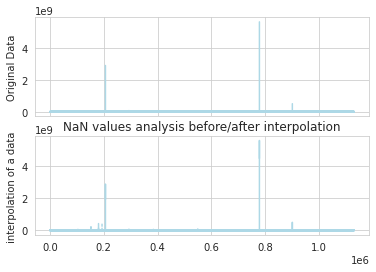

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1977)

def interpolate_gaps(values, limit=None):
    """
    Fill gaps using linear interpolation, optionally only fill gaps up to a
    size of `limit`.
    """
    values = np.asarray(values)
    i = np.arange(values.size)
    valid = np.isfinite(values)
    filled = np.interp(i, i[valid], values[valid])

    if limit is not None:
        invalid = ~valid
        for n in range(1, limit+1):
            invalid[:-n] &= invalid[n:]
        filled[invalid] = np.nan

    return filled

#x = np.random.normal(0, 1, 1000).cumsum()
x= movies_df['ratings_Numbers_Only']

# Set every third value to NaN
x[::3] = np.nan

# Set a few bigger gaps...
x[20:100], x[200:300], x[400:450] = np.nan, np.nan, np.nan

# Interpolate small gaps using numpy
filled = interpolate_gaps(x, limit=1)
#filled1 = interpolate_gaps(x, limit=2)
#filled2 = interpolate_gaps(x, limit=3)
#filled3 = interpolate_gaps(x, limit=4)
#filled4 = interpolate_gaps(x, limit=5)
# Let's plot the results
fig, axes = plt.subplots(nrows=2, sharex=True)
axes[0].plot(x, color='lightblue')
axes[1].plot(filled, color='lightblue')
#axes[2].plot(filled1, color='lightblue')
#axes[3].plot(filled2, color='lightblue')
#axes[4].plot(filled3, color='lightblue')
#axes[5].plot(filled4, color='lightblue')

axes[0].set(ylabel='Original Data')
axes[1].set(ylabel='interpolation of a data ')
#axes[2].set(ylabel='Filled Data limit 2')
#axes[3].set(ylabel='Filled Data limit 3')
#axes[4].set(ylabel='Filled Data limit 4')
#axes[5].set(ylabel='Filled Data limit 5')
plt.title('NaN values analysis before/after interpolation')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
#x = review_scores_df['review_score']
x = np.arange(0, 757072, 0.01)
#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=4), label='df: 4', color='gold')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8', color='red')
plt.plot(x, chi2.pdf(x, df=12), label='df: 12', color='pink')

#add legend to plot
plt.legend(title='Parameters')

#add axes labels and a title
plt.ylabel('Density')
plt.xlabel('x')
plt.title('Chi-Square Distributions', fontsize=14)

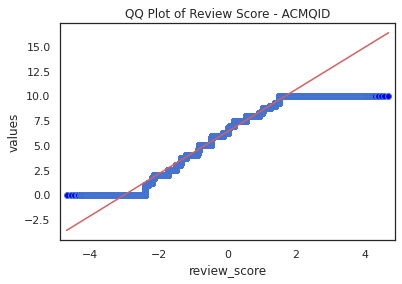

In [ ]:
# q-q plot
qqplot(review_scores_df['review_score'], line='s')
plt.title('QQ Plot of Review Score - ACMQID')
plt.xlabel('review_score')
plt.ylabel('values')
pyplot.show()

In [ ]:
# normality test
stat, p = shapiro(review_scores_df['review_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.968, p=0.000


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [ ]:
# normality test
stat, p = normaltest(review_scores_df['review_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('For D Agostino and Pearsons Test - Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=24221.989, p=0.000
Sample does not look Gaussian (reject H0)


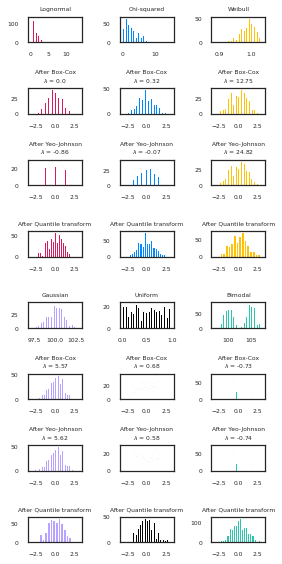

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split


N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(304)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from plotly.offline import init_notebook_mode,iplot
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.pairplot([review_scores_df[review_score]])
plt.show()

NameError: ignored

<Figure size 1440x1440 with 0 Axes>